# Cети остаточного обучения

## Использование предобученной сети остаточного обучения

In [14]:
import keras
import os
import matplotlib.pyplot as plt

In [2]:
from keras.applications import ResNet50
conv_base = ResNet50(include_top=False, pooling='avg')

In [3]:
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
___________________________________________________________________________________________

In [6]:
base_dir = 'C:\\Users\\Admin\\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [9]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 2048))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
train_features = np.reshape(train_features, (2000, 2048))
validation_features = np.reshape(validation_features, (1000, 2048))
test_features = np.reshape(test_features, (1000, 2048))

In [16]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=200,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/200
2000/2000 [==============================] - 0s 237us/step - loss: 0.7626 - acc: 0.5065 - val_loss: 0.6790 - val_acc: 0.6050
Epoch 2/200
2000/2000 [==============================] - 0s 191us/step - loss: 0.7486 - acc: 0.5190 - val_loss: 0.6752 - val_acc: 0.5810
Epoch 3/200
2000/2000 [==============================] - 0s 188us/step - loss: 0.7456 - acc: 0.5165 - val_loss: 0.6707 - val_acc: 0.6150
Epoch 4/200
2000/2000 [==============================] - 0s 183us/step - loss: 0.7229 - acc: 0.5320 - val_loss: 0.6690 - val_acc: 0.5870
Epoch 5/200
2000/2000 [==============================] - 0s 212us/step - loss: 0.7222 - acc: 0.5325 - val_loss: 0.6651 - val_acc: 0.6270
Epoch 6/200
2000/2000 [==============================] - 0s 195us/step - loss: 0.7102 - acc: 0.5430 - val_loss: 0.6629 - val_acc: 0.6230
Epoch 7/200
2000/2000 [==============================] - 0s 187us/step - loss: 0.7082 - acc: 0.5310 - val_loss: 0.6602 - val_acc: 

2000/2000 [==============================] - 0s 196us/step - loss: 0.6416 - acc: 0.6255 - val_loss: 0.6338 - val_acc: 0.6440
Epoch 61/200
2000/2000 [==============================] - 0s 180us/step - loss: 0.6406 - acc: 0.6425 - val_loss: 0.6336 - val_acc: 0.6460
Epoch 62/200
2000/2000 [==============================] - 0s 195us/step - loss: 0.6416 - acc: 0.6445 - val_loss: 0.6346 - val_acc: 0.6410
Epoch 63/200
2000/2000 [==============================] - 0s 180us/step - loss: 0.6453 - acc: 0.6280 - val_loss: 0.6334 - val_acc: 0.6400
Epoch 64/200
2000/2000 [==============================] - 0s 187us/step - loss: 0.6398 - acc: 0.6380 - val_loss: 0.6333 - val_acc: 0.6420
Epoch 65/200
2000/2000 [==============================] - 0s 195us/step - loss: 0.6412 - acc: 0.6420 - val_loss: 0.6332 - val_acc: 0.6400
Epoch 66/200
2000/2000 [==============================] - 0s 187us/step - loss: 0.6391 - acc: 0.6370 - val_loss: 0.6330 - val_acc: 0.6370
Epoch 67/200
2000/2000 [=======================

2000/2000 [==============================] - 0s 191us/step - loss: 0.6186 - acc: 0.6595 - val_loss: 0.6152 - val_acc: 0.6590
Epoch 179/200
2000/2000 [==============================] - 0s 180us/step - loss: 0.6213 - acc: 0.6580 - val_loss: 0.6152 - val_acc: 0.6630
Epoch 180/200
2000/2000 [==============================] - 0s 187us/step - loss: 0.6206 - acc: 0.6540 - val_loss: 0.6151 - val_acc: 0.6570
Epoch 181/200
2000/2000 [==============================] - 0s 180us/step - loss: 0.6248 - acc: 0.6545 - val_loss: 0.6151 - val_acc: 0.6590
Epoch 182/200
2000/2000 [==============================] - 0s 182us/step - loss: 0.6209 - acc: 0.6560 - val_loss: 0.6183 - val_acc: 0.6620
Epoch 183/200
2000/2000 [==============================] - 0s 188us/step - loss: 0.6200 - acc: 0.6610 - val_loss: 0.6160 - val_acc: 0.6640
Epoch 184/200
2000/2000 [==============================] - 0s 172us/step - loss: 0.6208 - acc: 0.6590 - val_loss: 0.6144 - val_acc: 0.6670
Epoch 185/200
2000/2000 [================

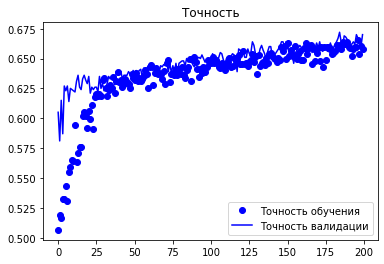

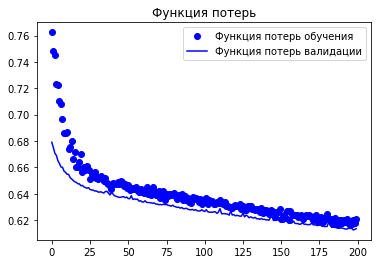

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Точность обучения')
plt.plot(epochs, val_acc, 'b', label='Точность валидации')
plt.title('Точность')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Функция потерь обучения')
plt.plot(epochs, val_loss, 'b', label='Функция потерь валидации')
plt.title('Функция потерь')
plt.legend()

plt.show()

## Построение сети остаточного обучения с помощью функционального API

In [34]:
from keras.models import Model
from keras import Input

input_tensor = Input(shape=(150, 150, 3)) 
residual = layers.Conv2D(128, 1, strides=10, padding='same', activation='relu')(input_tensor)

x = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))(input_tensor)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.add([x, residual])
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output_tensor = layers.Dense(1, activation='sigmoid')(x)

model = Model(input_tensor, output_tensor)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_56 (Conv2D)              (None, 148, 148, 32) 896         input_13[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_38 (MaxPooling2D) (None, 74, 74, 32)   0           conv2d_56[0][0]                  
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 72, 72, 64)   18496       max_pooling2d_38[0][0]           
____________________________________________________________________________________________

In [35]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [36]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
base_model_history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6484 - acc: 0.6260 - val_loss: 0.7854 - val_acc: 0.5520
Epoch 2/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6004 - acc: 0.6735 - val_loss: 0.6891 - val_acc: 0.6730
Epoch 3/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5617 - acc: 0.7090 - val_loss: 0.6584 - val_acc: 0.6870
Epoch 4/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5294 - acc: 0.7455 - val_loss: 0.4609 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 6s 62ms/step - loss: 0.4976 - acc: 0.7615 - val_loss: 0.5363 - val_acc: 0.7090
Epoch 6/30
100/100 [==============================] - 6s 62ms/step - loss: 0.4721 - acc: 0.7825 - val_loss: 0.5441 - val_acc: 0.6760
Epoch 7/30
100/100 [==============================] - 6s 62ms/step - loss: 0.4362 - acc: 0.7910 - val_loss: 0.6528 - val_acc: 0.6960
Epoch 8/30
100/100 [==============================] - 6s 62ms/step - 

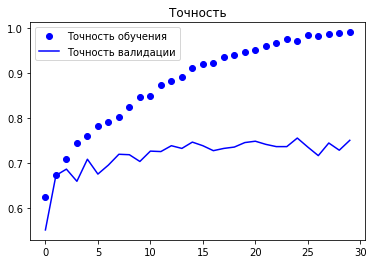

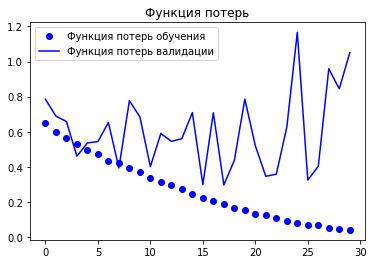

In [40]:
history = base_model_history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Точность обучения')
plt.plot(epochs, val_acc, 'b', label='Точность валидации')
plt.title('Точность')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Функция потерь обучения')
plt.plot(epochs, val_loss, 'b', label='Функция потерь валидации')
plt.title('Функция потерь')
plt.legend()

plt.show()